In [1]:
import pandas as pd
import pickle

embeddings = []

# read the 3 separate files with information regarding embeddings
for file in ['processed_data/all_restaurant_vectors_pt1',
             'processed_data/all_restaurant_vectors_pt2',
             'processed_data/all_restaurant_vectors_pt3']:

    # read file and obtain data for ids and restaurants
    with open(file, "rb") as pickle_file:
        restaurant_vectors = pickle.load(pickle_file)

        # add the data to our new lists with all information
        ids = restaurant_vectors[0]
        embeddings += restaurant_vectors[1]

# create dataframe from lists
restaurants = {'business_id': ids, 'embedding': embeddings}
restaurants = pd.DataFrame(data=restaurants)

# show results
restaurants

,business_id,embedding
0,---kPU91CF4Lq2-WlRu9Lw,"[0.0, 0.0012626262626262606, 0.0, 0.0, 0.00126..."
1,--0iUa4sNDFiZFrAdIWhZQ,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,--30_8IhuyMHbSOcNWd6DQ,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,--7PUidqRWpRSpXebiyxTg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,--7jw19RH9JKXgFohspgQw,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
150341,zznZqH9CiAznbkV6fXyHWA,"[0.0, 0.0018939393939393927, 0.0, 0.0, 0.0, 0...."
150342,zztOG2cKm87I6Iw_tleZsQ,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
150343,zzu6_r3DxBJuXcjnOYVdTw,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
150344,zzw66H6hVjXQEt0Js3Mo4A,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [2]:
# import models
pca = pickle.load(open('models/price_score_pca.sav', 'rb'))
svm = pickle.load(open('models/price_score_model.sav', 'rb'))

# reduce the dimensions of the embeddings
pca_embedding = pca.transform(restaurants['embedding'].tolist())

# check the new embeddings
pca_embedding.shape

(150346, 64)

In [3]:
# obtain the price score for every restaurant
price_score = svm.predict(pca_embedding)

# check the price scores
price_score.shape

(150346,)

In [4]:
# add price score to the dataframe
restaurants['price_score'] = price_score

# import data for reviews
reviews = pd.read_csv('csv_data/yelp_academic_dataset_review.csv')

# filter the data to reviews of restaurants with a price score
reviews = reviews[reviews['business_id'].isin(restaurants['business_id'].tolist())]

# transfer information from price score to reviews
price_information = dict(zip(restaurants['business_id'].tolist(), restaurants['price_score'].tolist()))
reviews['price_score'] = reviews['business_id'].apply(lambda x: price_information.get(x))

reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,price_score
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2.063325
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2.695258
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1.959730
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2.165627
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.263071
...,...,...,...,...,...,...,...,...,...,...
6990277,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2.549610
6990278,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2.0,1.0,2.0,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,2.824653
6990279,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2.534315
6990280,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2.042872


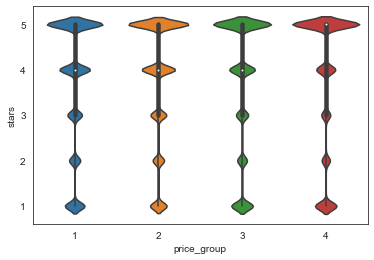

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

reviews['price_group'] = 1
reviews.loc[reviews['price_score'] > reviews['price_score'].quantile(0.25), 'price_group'] = 2
reviews.loc[reviews['price_score'] > reviews['price_score'].quantile(0.50), 'price_group'] = 3
reviews.loc[reviews['price_score'] > reviews['price_score'].quantile(0.75), 'price_group'] = 4

sns.violinplot(data=reviews, x='price_group', y='stars')
plt.show()

In [6]:
# import data for users
users = pd.read_csv('csv_data/yelp_academic_dataset_user.csv')

# create a list with users with at least 20 reviews given
users = users[users['review_count'] >= 100]
users_list = users['user_id'].tolist()

# show new dataframe
users

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983608,7wKPO5zyqAHrso47aPBJ4w,Jenna,106,2013-05-11 00:34:43,176,82,39,NaN,None,1,...,1,0,0,0,1,4,0,0,1,0
1983882,RuG6HA3XdBIRHoSisrpEow,Nicole,132,2014-12-10 01:14:56,34,11,11,NaN,None,1,...,1,1,0,0,3,0,0,0,0,0
1984558,zzCr9iwRFxduxCd7965Vzw,Lo,148,2017-07-01 22:21:36,74,9,17,NaN,None,1,...,0,0,0,0,0,1,2,2,0,0
1985929,mQg0UDuA2Otfn09XkEtr9Q,Terri,104,2012-05-08 19:56:34,72,15,15,NaN,None,1,...,0,0,0,0,1,0,0,0,0,0


In [10]:
import random
from tqdm.notebook import tqdm

# select 10000 random users that we will study
random.seed(0)
users_list = random.choices(users_list, k=30000)

# reduce the reviews to only these users
reviews['price_score_squared'] = reviews['price_score'] ** 2
reviews = reviews[reviews['user_id'].isin(users_list)]

# create dictionaries to store the data
user_expectation = {}

# get the expectation coefficient for users and the mean price score
for user in tqdm(users_list):
    user_reviews = reviews[reviews['user_id'] == user]
    user_expectation[user] = [user_reviews[['price_score', 'stars']].corr().iloc[0, 1],
                              user_reviews['price_score_squared'].mean()]

<ipython-input-10-2409d8b3bf09>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['price_score_squared'] = reviews['price_score'] ** 2


  0%|          | 0/30000 [00:00<?, ?it/s]

In [14]:
# create new dataframe for user expectations
user_expectations = pd.DataFrame.from_dict(user_expectation, orient='index').reset_index()

# rename columns
user_expectations = user_expectations.rename(columns={"index": "user_id", 0: "correlation", 1: "wage_score"})

# drop rows with null values
user_expectations = user_expectations.dropna()

# check new dataframe
user_expectations

,user_id,correlation,wage_score
0,N5RusOux5jDS0q8TrZSjbA,0.051733,4.813687
1,ZudG3YIMP-6xda4yT0OeEQ,0.623609,5.121401
2,8M-yAk28ig8tBzSZoixnGQ,-0.514969,4.939499
4,0Kbv8t9druV66MHOZCIWgA,0.308531,6.326497
5,rrzDPivPpxPxMNpgB5FsUw,0.548771,5.970992
...,...,...,...
9001,kJdf_FTr69qBeJtfPiQoCQ,0.489449,3.443092
9002,ElDfk_42hMdjU_weLWRKtA,-0.212304,3.430137
9003,6QtNOhVceyHTCKvxgr9sVA,-1.000000,4.545223
9004,3fCb2So6bBV_EK8RUQ6cug,0.145175,7.678741


In [15]:
# create a column for expectation coefficient
user_expectations['expectation'] = 0.5 * (1 - user_expectations['correlation'])

# check df
user_expectations

,user_id,correlation,wage_score,expectation
0,N5RusOux5jDS0q8TrZSjbA,0.051733,4.813687,0.474133
1,ZudG3YIMP-6xda4yT0OeEQ,0.623609,5.121401,0.188196
2,8M-yAk28ig8tBzSZoixnGQ,-0.514969,4.939499,0.757485
4,0Kbv8t9druV66MHOZCIWgA,0.308531,6.326497,0.345735
5,rrzDPivPpxPxMNpgB5FsUw,0.548771,5.970992,0.225615
...,...,...,...,...
9001,kJdf_FTr69qBeJtfPiQoCQ,0.489449,3.443092,0.255275
9002,ElDfk_42hMdjU_weLWRKtA,-0.212304,3.430137,0.606152
9003,6QtNOhVceyHTCKvxgr9sVA,-1.000000,4.545223,1.000000
9004,3fCb2So6bBV_EK8RUQ6cug,0.145175,7.678741,0.427412


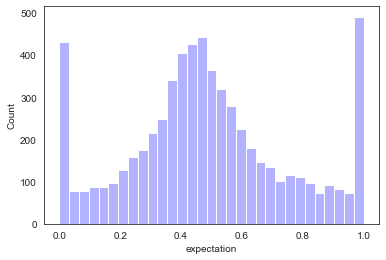

In [18]:
# check distribution of expectation values
sns.histplot(data=user_expectations, x='expectation', color=[0.6, 0.6, 1.0], fill=True)
plt.savefig('figures/expectation_coefficient_distribution.png', dpi=200)
plt.show()

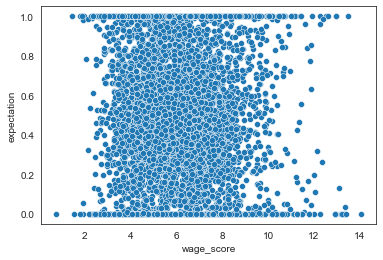

In [19]:
sns.scatterplot(data=user_expectations, x='wage_score', y='expectation')
plt.show()

In [20]:
user_expectations.corr()

,correlation,wage_score,expectation
correlation,1.00000,0.01042,-1.00000
wage_score,0.01042,1.00000,-0.01042
expectation,-1.00000,-0.01042,1.00000
